In [3]:
# Importar o Pandas como pd
import pandas as pd

In [4]:
# Importar minha base de dados
df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CSV_Unimed/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CSV_Unimed/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CSV_Unimed/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CSV_Unimed/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CSV_Unimed/Salvador.xlsx')

In [5]:
# Convertendo tudo para um unico base de dados
df = pd.concat([df1, df2, df3, df4, df5])

In [6]:
# Criando uma coluna de Receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])
# Criando um coluna de forama inversa
df['Receita/Vendas'] = df['Receita'] / df['Vendas']

In [7]:
# Criar uma nova coluna com o ano
df['Ano_Venda'] = df['Data'].dt.year

In [8]:
# Extraindo o mes e o dia
df['Mês_Vendas'], df['Dia_Venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [9]:
# Calcular a diferança de dias
df['diferença_dias'] = df['Data'] - df['Data'].min()

In [10]:
# Criar um coluna de trimestre
df['difrença_venda'] = df['Data'].dt.quarter

In [11]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mês_Vendas,Dia_Venda,diferença_dias,difrença_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1,0 days,1


In [12]:
# Fazer um contagem de vendas por loja
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

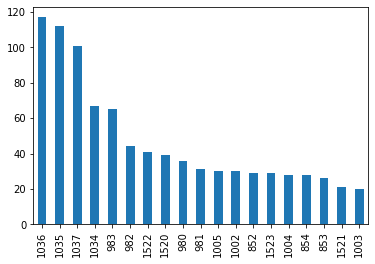

In [13]:
# Biblioteca matplotlib integrada com pandas
# Criar um grafico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()

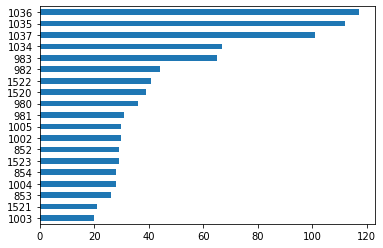

In [14]:
# Criar um grafico de barras horizontal
# ; => remover a as informações matplotlib
df['LojaID'].value_counts(ascending=True).plot.barh();

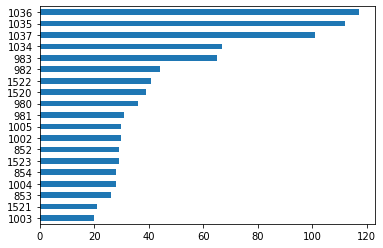

In [18]:
df['LojaID'].value_counts(ascending=True).plot.barh()

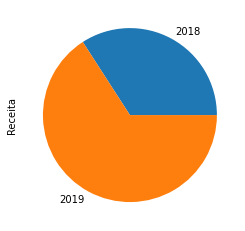

In [17]:
# Grafico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [16]:
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total vendas')

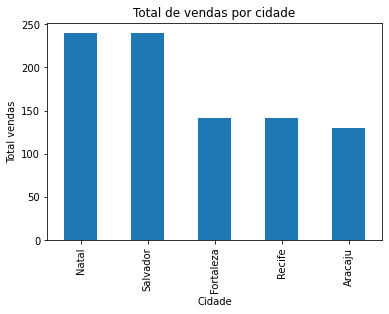

In [21]:
# Adicionar um titulo e alterando o nome dos eixo
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total vendas')

Text(0, 0.5, 'Total vendas')

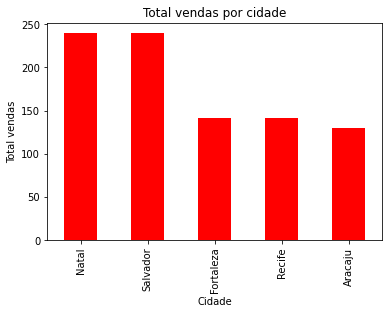

In [23]:
# Alterar cor do grafico
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total vendas')

In [25]:
# Alterar o estilo matplotlib
plt.style.use('ggplot')

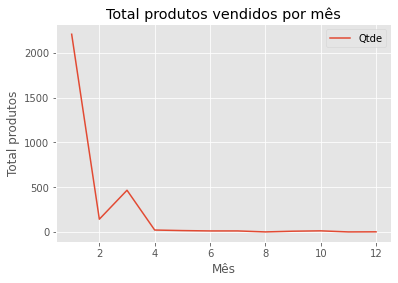

In [36]:
 df.groupby(df['Mês_Vendas'])['Qtde'].sum().plot(title='Total produtos vendidos por mês')
 plt.xlabel('Mês')
 plt.ylabel('Total produtos')
 plt.legend();  # Quando possui varios codigos para chamar um grafico deve se usar o ';' no ultimo comando

In [38]:
df.groupby(df['Mês_Vendas'])["Qtde"].sum()

Mês_Vendas
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [50]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]
df_2019.groupby(df_2019['Mês_Vendas'])['Qtde'].sum()

Mês_Vendas
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

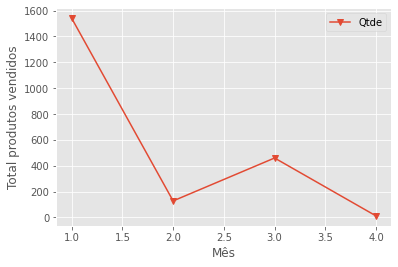

In [49]:
# Total produtos vendidos por mês
df_2019.groupby(df_2019['Mês_Vendas'])['Qtde'].sum().plot(marker = 'v')  # Em marker pode ser usar  '*' ou 'o' ou 'v'
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend();

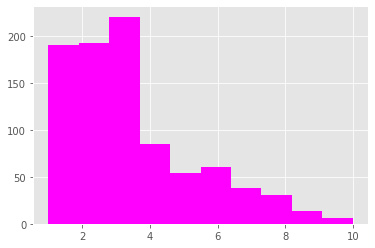

In [52]:
# Alterar grafico para histograma
plt.hist(df['Qtde'], color='magenta');

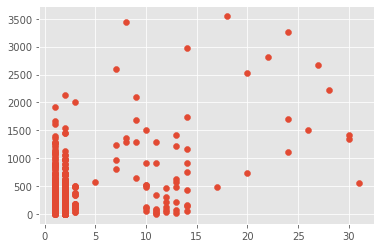

In [53]:
# Alterar grafico para scatter ploter
plt.scatter(x=df_2019['Dia_Venda'], y = df_2019['Receita']);

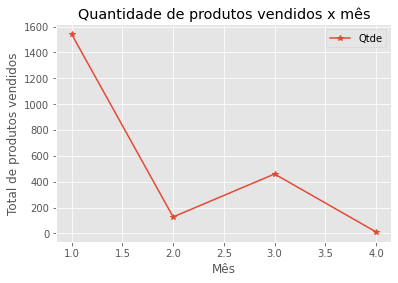

In [57]:
# Como salvar um grafico como imagem
df_2019.groupby(df_2019['Mês_Vendas'])['Qtde'].sum().plot(marker = '*')
plt.title('Quantidade de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend()
# Apos criar todas as configurações do grafico basta salvar
plt.savefig('grafico_qtds_x_mes.png')  # Salva arquivo em seu Driver raiz '/'